In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


x = pd.read_csv('job_descriptions.csv')

# Extract job descriptions
job_descriptions = x['Job Description']

all_descriptions = ' '.join(job_descriptions)

# Tokenize the text into words
words = word_tokenize(all_descriptions)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

# Calculate frequency distribution
fdist = FreqDist(filtered_words)

# Plot the most common words
plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.title('Top 30 Most Common Words in Job Descriptions')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


In [2]:
x.describe()

Job Id      latitude     longitude  Company Size
count  1.615940e+06  1.615940e+06  1.615940e+06  1.615940e+06
mean   1.548935e+15  1.937743e+01  1.639926e+01  7.370467e+04
std    8.946722e+14  2.355690e+01  7.066762e+01  3.529886e+04
min    1.817948e+11 -4.090060e+01 -1.751982e+02  1.264600e+04
25%    7.740508e+14  5.152100e+00 -1.531010e+01  4.311400e+04
50%    1.547858e+15  1.807080e+01  1.914510e+01  7.363300e+04
75%    2.323729e+15  3.907420e+01  4.757690e+01  1.043000e+05
max    3.099618e+15  7.170690e+01  1.780650e+02  1.348340e+05

In [4]:
x.shape

(1615940, 23)

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [6]:
x.dtypes


Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
dtype: object

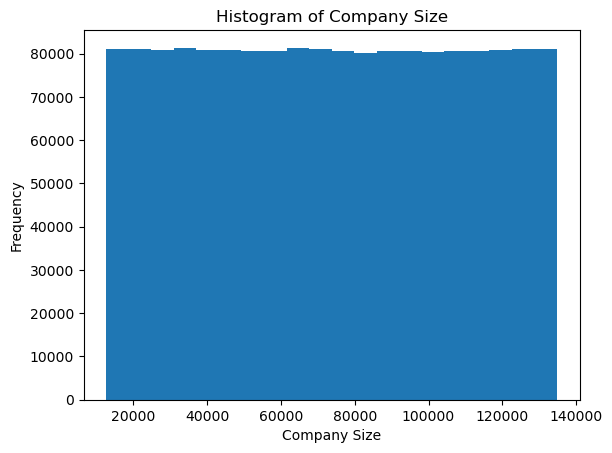

In [13]:
import matplotlib.pyplot as plt

plt.hist(x['Company Size'], bins=20)
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.title('Histogram of Company Size')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_22428\2552711917.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x.groupby(job_id_bins)['Company Size'].mean().plot(kind='bar')


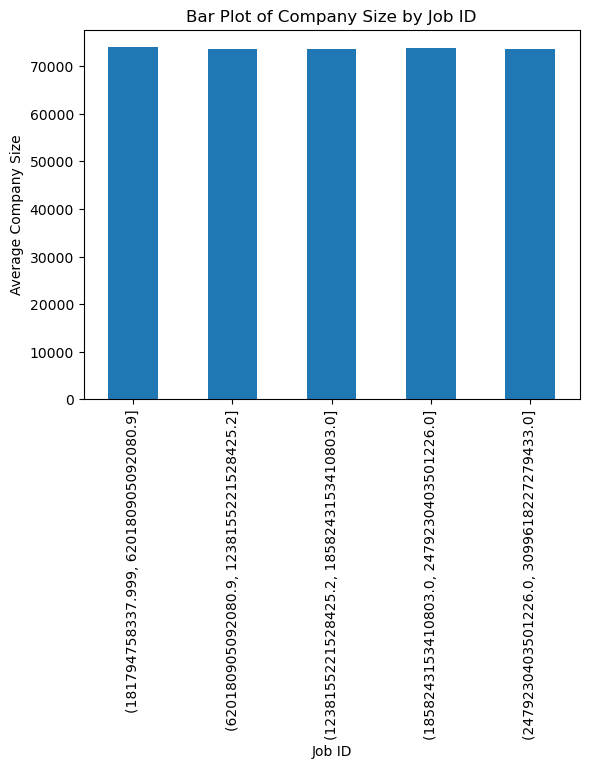

In [14]:
job_id_bins = pd.qcut(x['Job Id'], q=5)
x.groupby(job_id_bins)['Company Size'].mean().plot(kind='bar')
plt.xlabel('Job ID')
plt.ylabel('Average Company Size')
plt.title('Bar Plot of Company Size by Job ID')
plt.show()


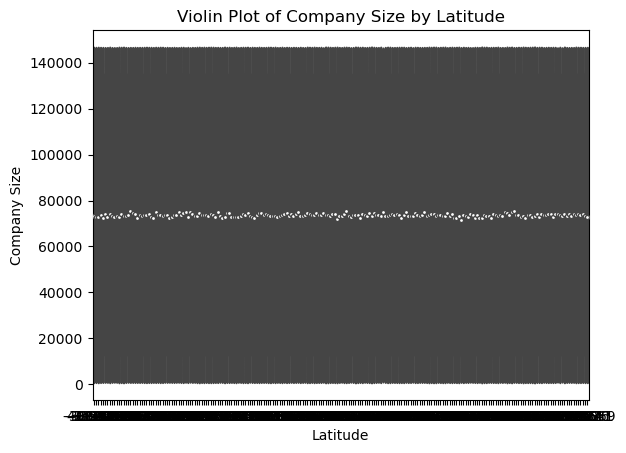

In [16]:
import seaborn as sns

sns.violinplot(x='latitude', y='Company Size', data=x)
plt.xlabel('Latitude')
plt.ylabel('Company Size')
plt.title('Violin Plot of Company Size by Latitude')
plt.show()


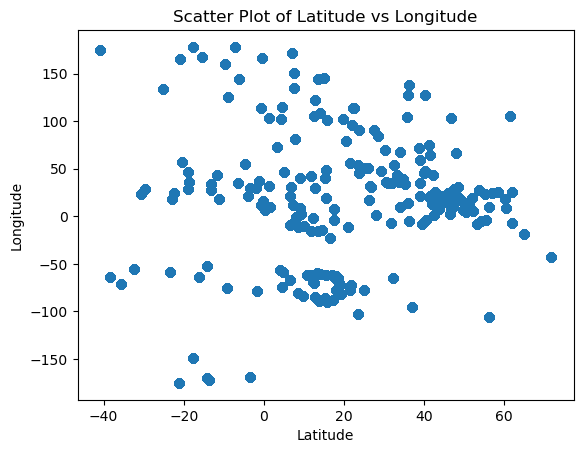

In [18]:
plt.scatter(x['latitude'], x['longitude'], alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs Longitude')
plt.show()


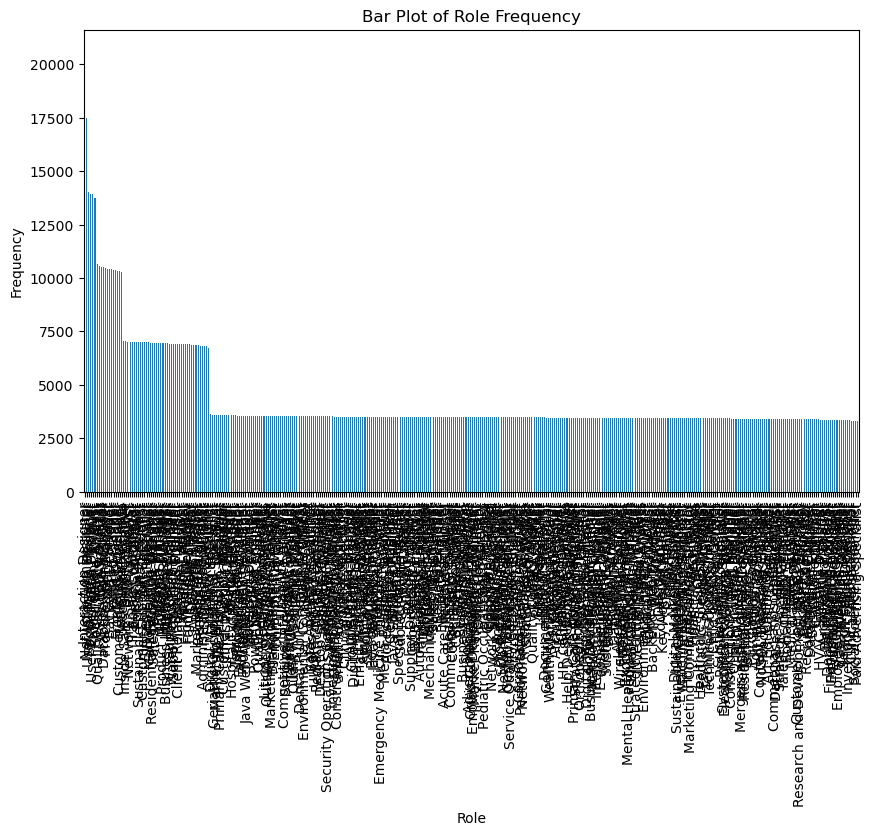

In [19]:
plt.figure(figsize=(10,6))
x['Role'].value_counts().plot(kind='bar')
plt.xlabel('Role') 
plt.ylabel('Frequency')
plt.title('Bar Plot of Role Frequency')
plt.show()


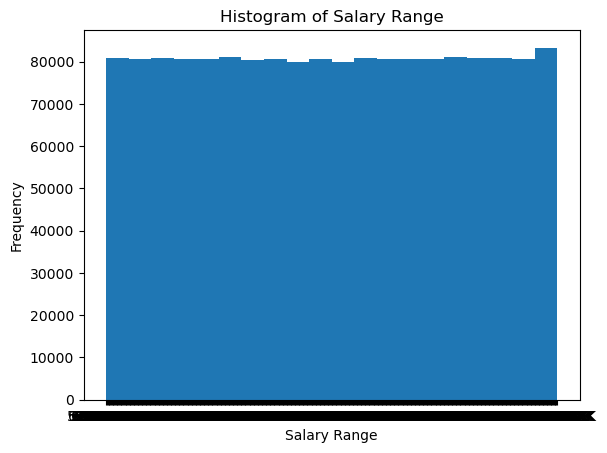

In [23]:
plt.hist(x['Salary Range'], bins=20)
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.title('Histogram of Salary Range')
plt.show()


In [24]:
x.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

In [26]:
x = x.drop(columns=['latitude'])


In [28]:
x = x.drop(columns=['longitude'])


In [29]:
x.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'Work Type', 'Company Size', 'Job Posting Date',
       'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role',
       'Job Portal', 'Job Description', 'Benefits', 'skills',
       'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

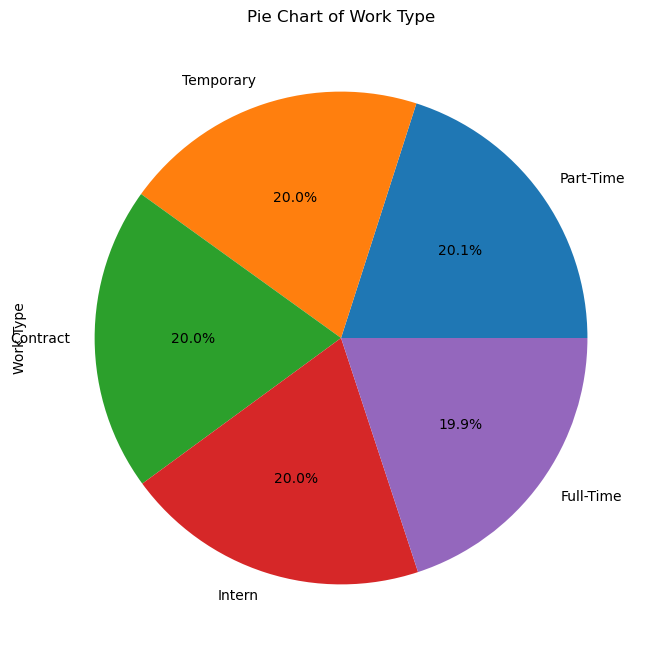

In [12]:
plt.figure(figsize=(8,8))
x['Work Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Work Type')
plt.title('Pie Chart of Work Type')
plt.show()


In [14]:
# Descriptive statistics for numeric columns
numeric_columns = ['Job Id', 'Salary Range', 'Company Size']
numeric_stats = x[numeric_columns].describe()
print(numeric_stats)



             Job Id  Company Size
count  1.615940e+06  1.615940e+06
mean   1.548935e+15  7.370467e+04
std    8.946722e+14  3.529886e+04
min    1.817948e+11  1.264600e+04
25%    7.740508e+14  4.311400e+04
50%    1.547858e+15  7.363300e+04
75%    2.323729e+15  1.043000e+05
max    3.099618e+15  1.348340e+05


In [15]:
# Distribution of categorical columns
categorical_columns = ['Work Type', 'Role', 'Job Portal']
for column in categorical_columns:
    print(x[column].value_counts())


Work Type
Part-Time    324044
Temporary    323439
Contract     323131
Intern       323090
Full-Time    322236
Name: count, dtype: int64
Role
Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: count, Length: 376, dtype: int64
Job Portal
FlexJobs               129879
Stack Overflow Jobs    129379
Jobs2Careers           129245
Snagajob               129088
USAJOBS                129066
SimplyHired            129059
The Muse               129033
Idealist               128952
Internships.com        128790
Monster                 65058
Dice                    64927
ZipRecruiter            64805
Indeed                  64776
C

In [2]:
import pandas as pd
x = pd.read_csv('job_descriptions.csv')
print(x)


                   Job Id     Experience Qualifications Salary Range  \
0        1089843540111562  5 to 15 Years         M.Tech    $59K-$99K   
1         398454096642776  2 to 12 Years            BCA   $56K-$116K   
2         481640072963533  0 to 12 Years            PhD   $61K-$104K   
3         688192671473044  4 to 11 Years            PhD    $65K-$91K   
4         117057806156508  1 to 12 Years            MBA    $64K-$87K   
...                   ...            ...            ...          ...   
1615935   134563577088850  0 to 12 Years         B.Tech   $64K-$114K   
1615936   618604818190827  2 to 14 Years         M.Tech   $62K-$130K   
1615937   615471367712200  4 to 15 Years            BCA    $60K-$96K   
1615938   804137342023945  5 to 15 Years            BCA   $65K-$103K   
1615939   404645755314484  1 to 11 Years            BBA   $56K-$109K   

                  location            Country  latitude  longitude  Work Type  \
0                  Douglas        Isle of Man   54.236

In [3]:


import matplotlib.pyplot as pd

# Your plotting code
plt.boxplot(x['Experience'])
plt.ylabel('Experience')
plt.title('Box Plot of Experience')
plt.show()



NameError: name 'x' is not defined

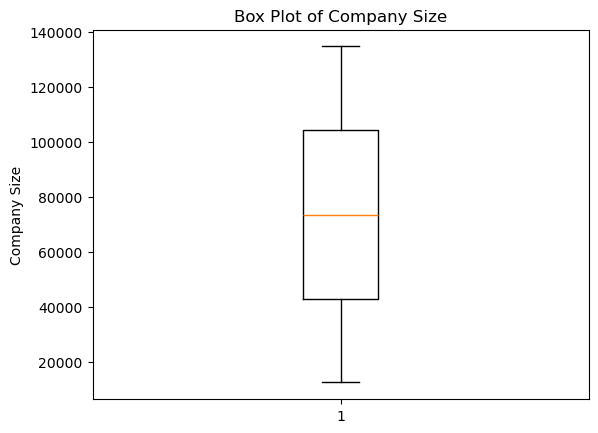

In [6]:
import pandas as pd
x = pd.read_csv('job_descriptions.csv')
plt.boxplot(x['Company Size'])
plt.ylabel('Company Size')
plt.title('Box Plot of Company Size')
plt.show()


In [5]:
import pandas as pd


# Load dataset
data = pd.read_csv("your_dataset.csv")

# Descriptive analysis
print("Summary Statistics:")
print(data.describe())

print("\nUnique Values and Frequency Distributions:")
for column in data.columns:
    print(column)
    print(data[column].value_counts())
    print()

# Text analysis of job descriptions
# Example: Sentiment analysis
sentiments = [TextBlob(text).sentiment.polarity for text in data["Job Description"]]
data["Sentiment"] = sentiments

# Company profile analysis
# Example: Analyze company profiles to understand company reputation, values, and culture
# You can use techniques like keyword extraction and sentiment analysis for this

# Further analysis and visualization as needed



FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [7]:
!pip install spacy


   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 16.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.8/12.1 MB 22.7 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/12.1 MB 24.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.8/12.1 MB 25.4 MB/s eta 0:00:01
   --------------------- ------------------ 6.5/12.1 MB 29.8 MB/s eta 0:00:01
   ------------------------- -------------- 7.8/12.1 MB 29.4 MB/s eta 0:00:01
   -------------------------------- ------- 9.7/12.1 MB 31.0 MB/s eta 0:00:01
   ------------------------------------- -- 11.2/12.1 MB 34.6 MB/s eta 0:00:01
   ---------------------------------------  12.1/12.1 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 29.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/182.0 kB ? eta -:--:--
   --------------------------------------- 182.0/182.0 kB 10.7 MB/s eta 0:00

In [8]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 469.7 kB/s eta 0:00:28
     - -------------------------------------- 0.4/12.8 MB 2.2 MB/s eta 0:00:06
     ----- ---------------------------------- 1.6/12.8 MB 7.9 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.8 MB 12.1 MB/s eta 0:00:01
     -------------- ------------------------- 4.7/12.8 MB 15.8 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 19.3 MB/s eta 0:00:01
     ------------------------ --------------- 8.0/12.8 MB 20.5 MB/s eta 0:00:01
     ------------------------------ --------- 9.8/12.8 MB 22.5 MB/s eta 0:00:01
     -------------------------------- ------ 10.8/12.8 MB 34.4 MB/s eta 0:00:01
     ---------------------------------- ---- 11.4/12.8 MB 

In [9]:
import pandas as pd
import spacy
from collections import Counter
from textblob import TextBlob

# Load dataset
data = pd.read_csv("your_dataset.csv")

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Keyword extraction
skills_responsibilities = []
company_values = []
for text in data["Job Description"]:
    doc = nlp(text)
    for token in doc:
        if token.pos_ == "NOUN":
            if token.dep_ == "dobj" or token.dep_ == "attr":
                skills_responsibilities.append(token.text)
            elif token.dep_ == "nsubj" or token.dep_ == "pobj":
                company_values.append(token.text)

# Sentiment analysis
sentiments = [TextBlob(text).sentiment.polarity for text in data["Job Description"]]
data["Sentiment"] = sentiments

# Optimization for search engine visibility (Not implemented in this example)

# Further analysis and visualization as needed
print("Common Skills and Responsibilities:")
print(Counter(skills_responsibilities).most_common(10))

print("\nCompany Values:")
print(Counter(company_values).most_common(5))

print("\nSentiment Analysis:")
print(data[["Job Description", "Sentiment"]])


ModuleNotFoundError: No module named 'textblob'

In [11]:
!pip install textblob


In [12]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('your_data.csv')

# Tokenize the text in the 'Job Description' column
descriptions = df['Job Description'].dropna().str.split()

# Flatten the list of lists and count the frequency of words
word_counts = Counter([word for sublist in descriptions for word in sublist])

# Plot word frequency using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Description')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
 import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Load the dataset
x = pd.read_csv('job_descriptions.csv')

# Extract job descriptions
job_descriptions = x['Job Description']

# Concatenate all job descriptions into a single string
all_descriptions = ' '.join(job_descriptions)

# Tokenize the text into words
words = word_tokenize(all_descriptions)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

# Calculate frequency distribution
fdist = FreqDist(filtered_words)

# Plot the most common words
plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.title('Top 30 Most Common Words in Job Descriptions')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


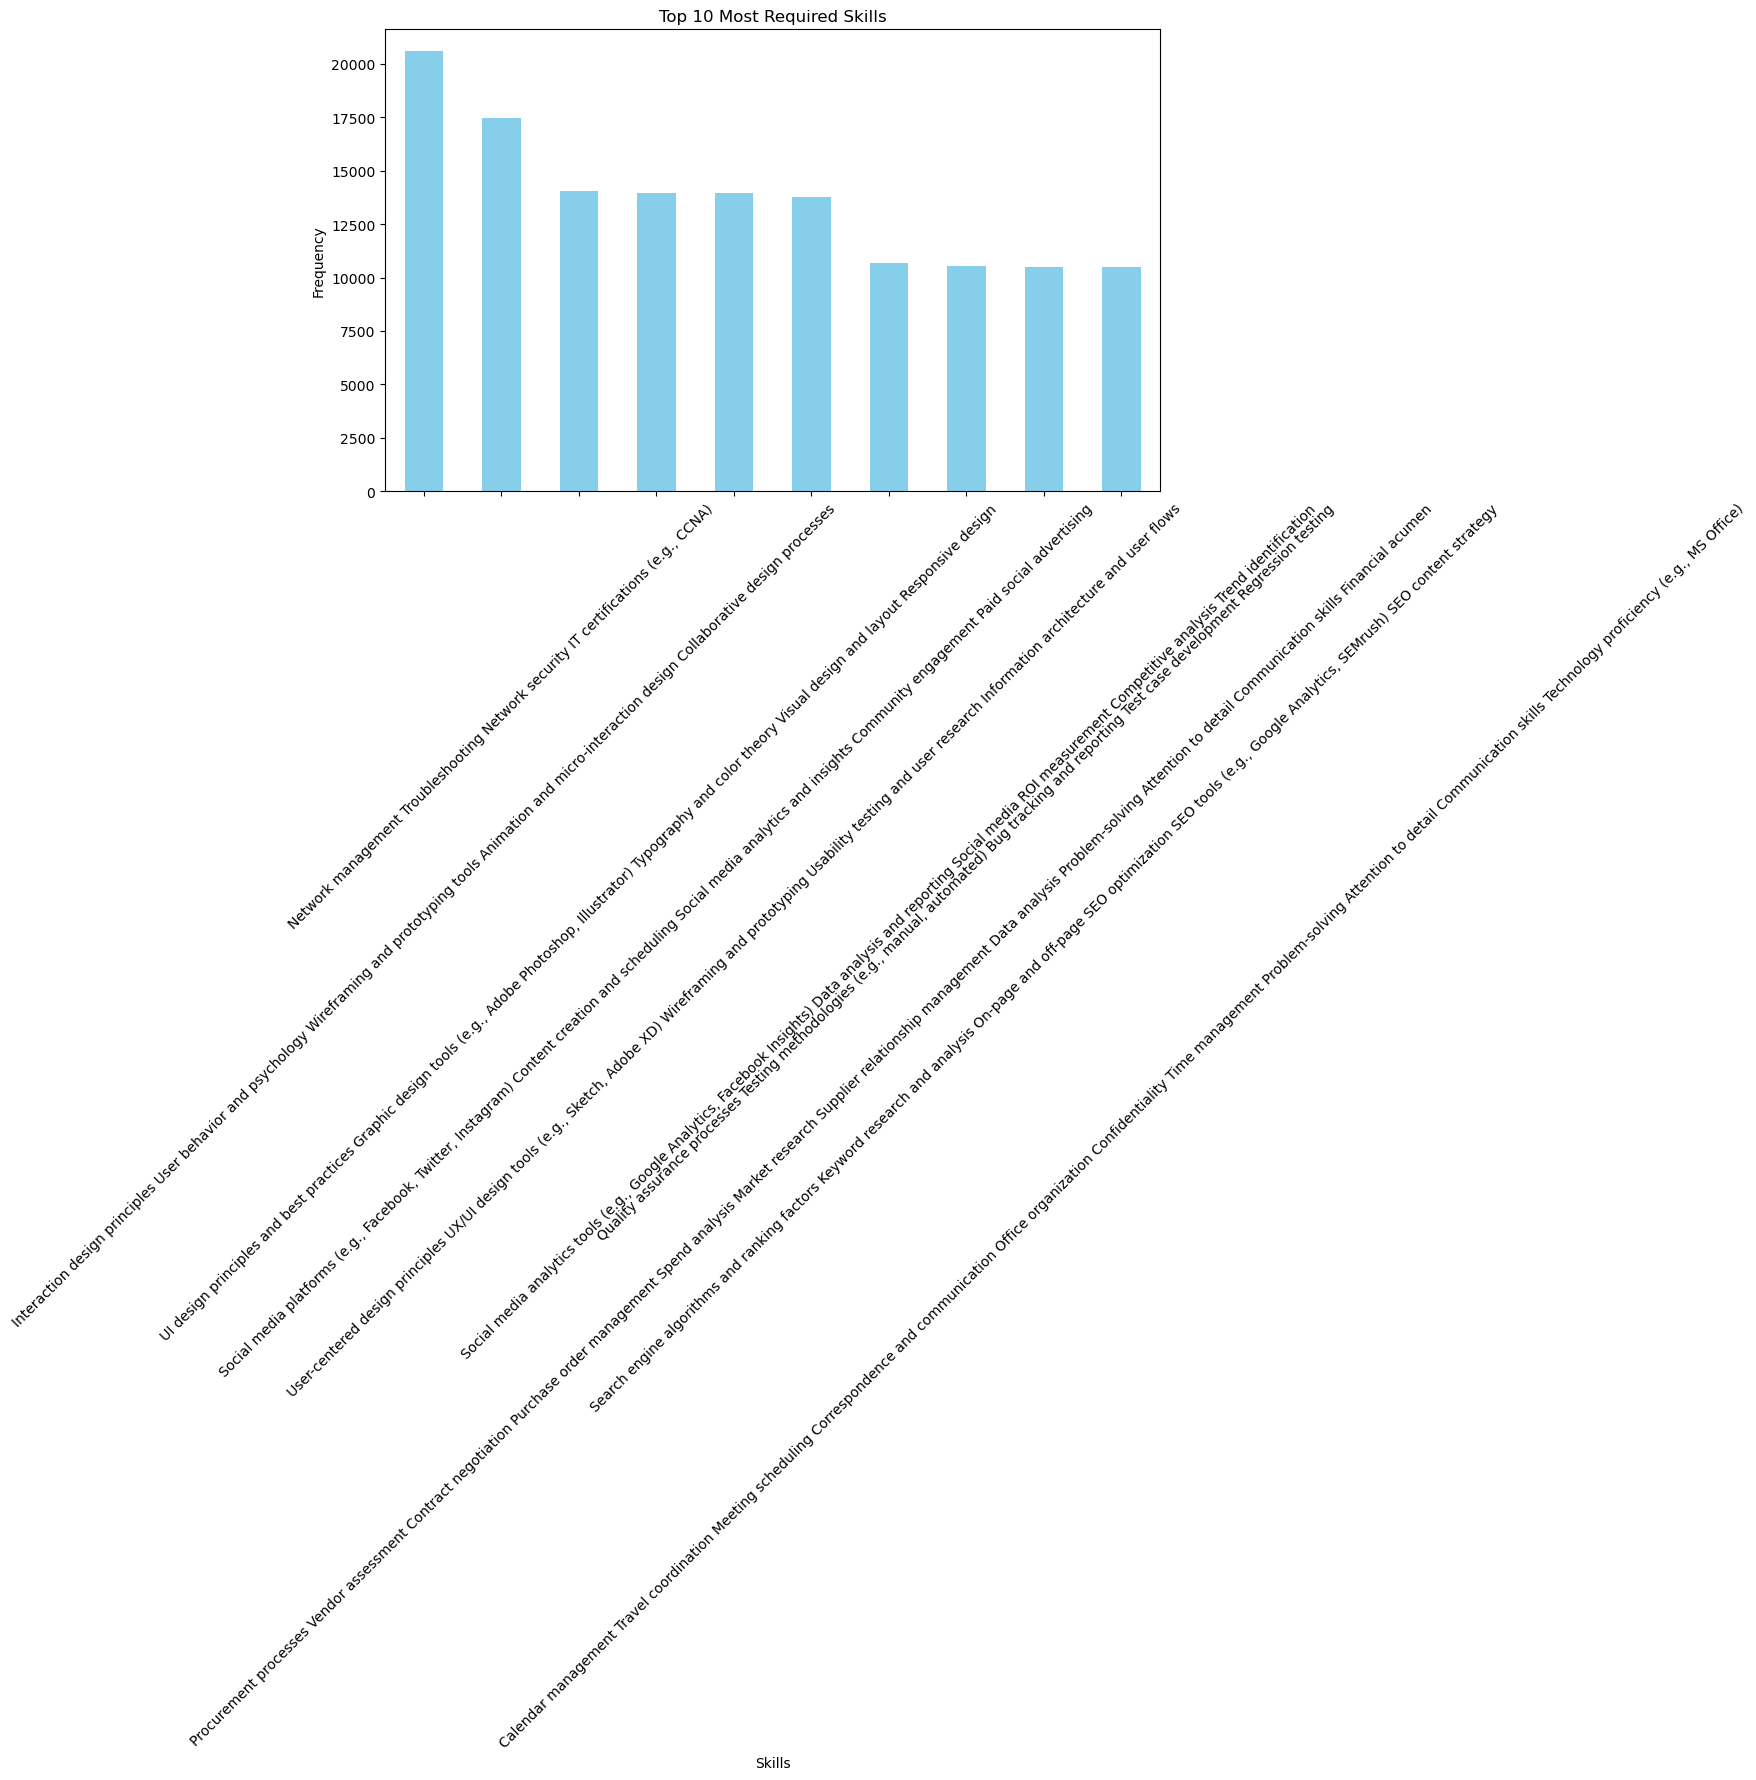

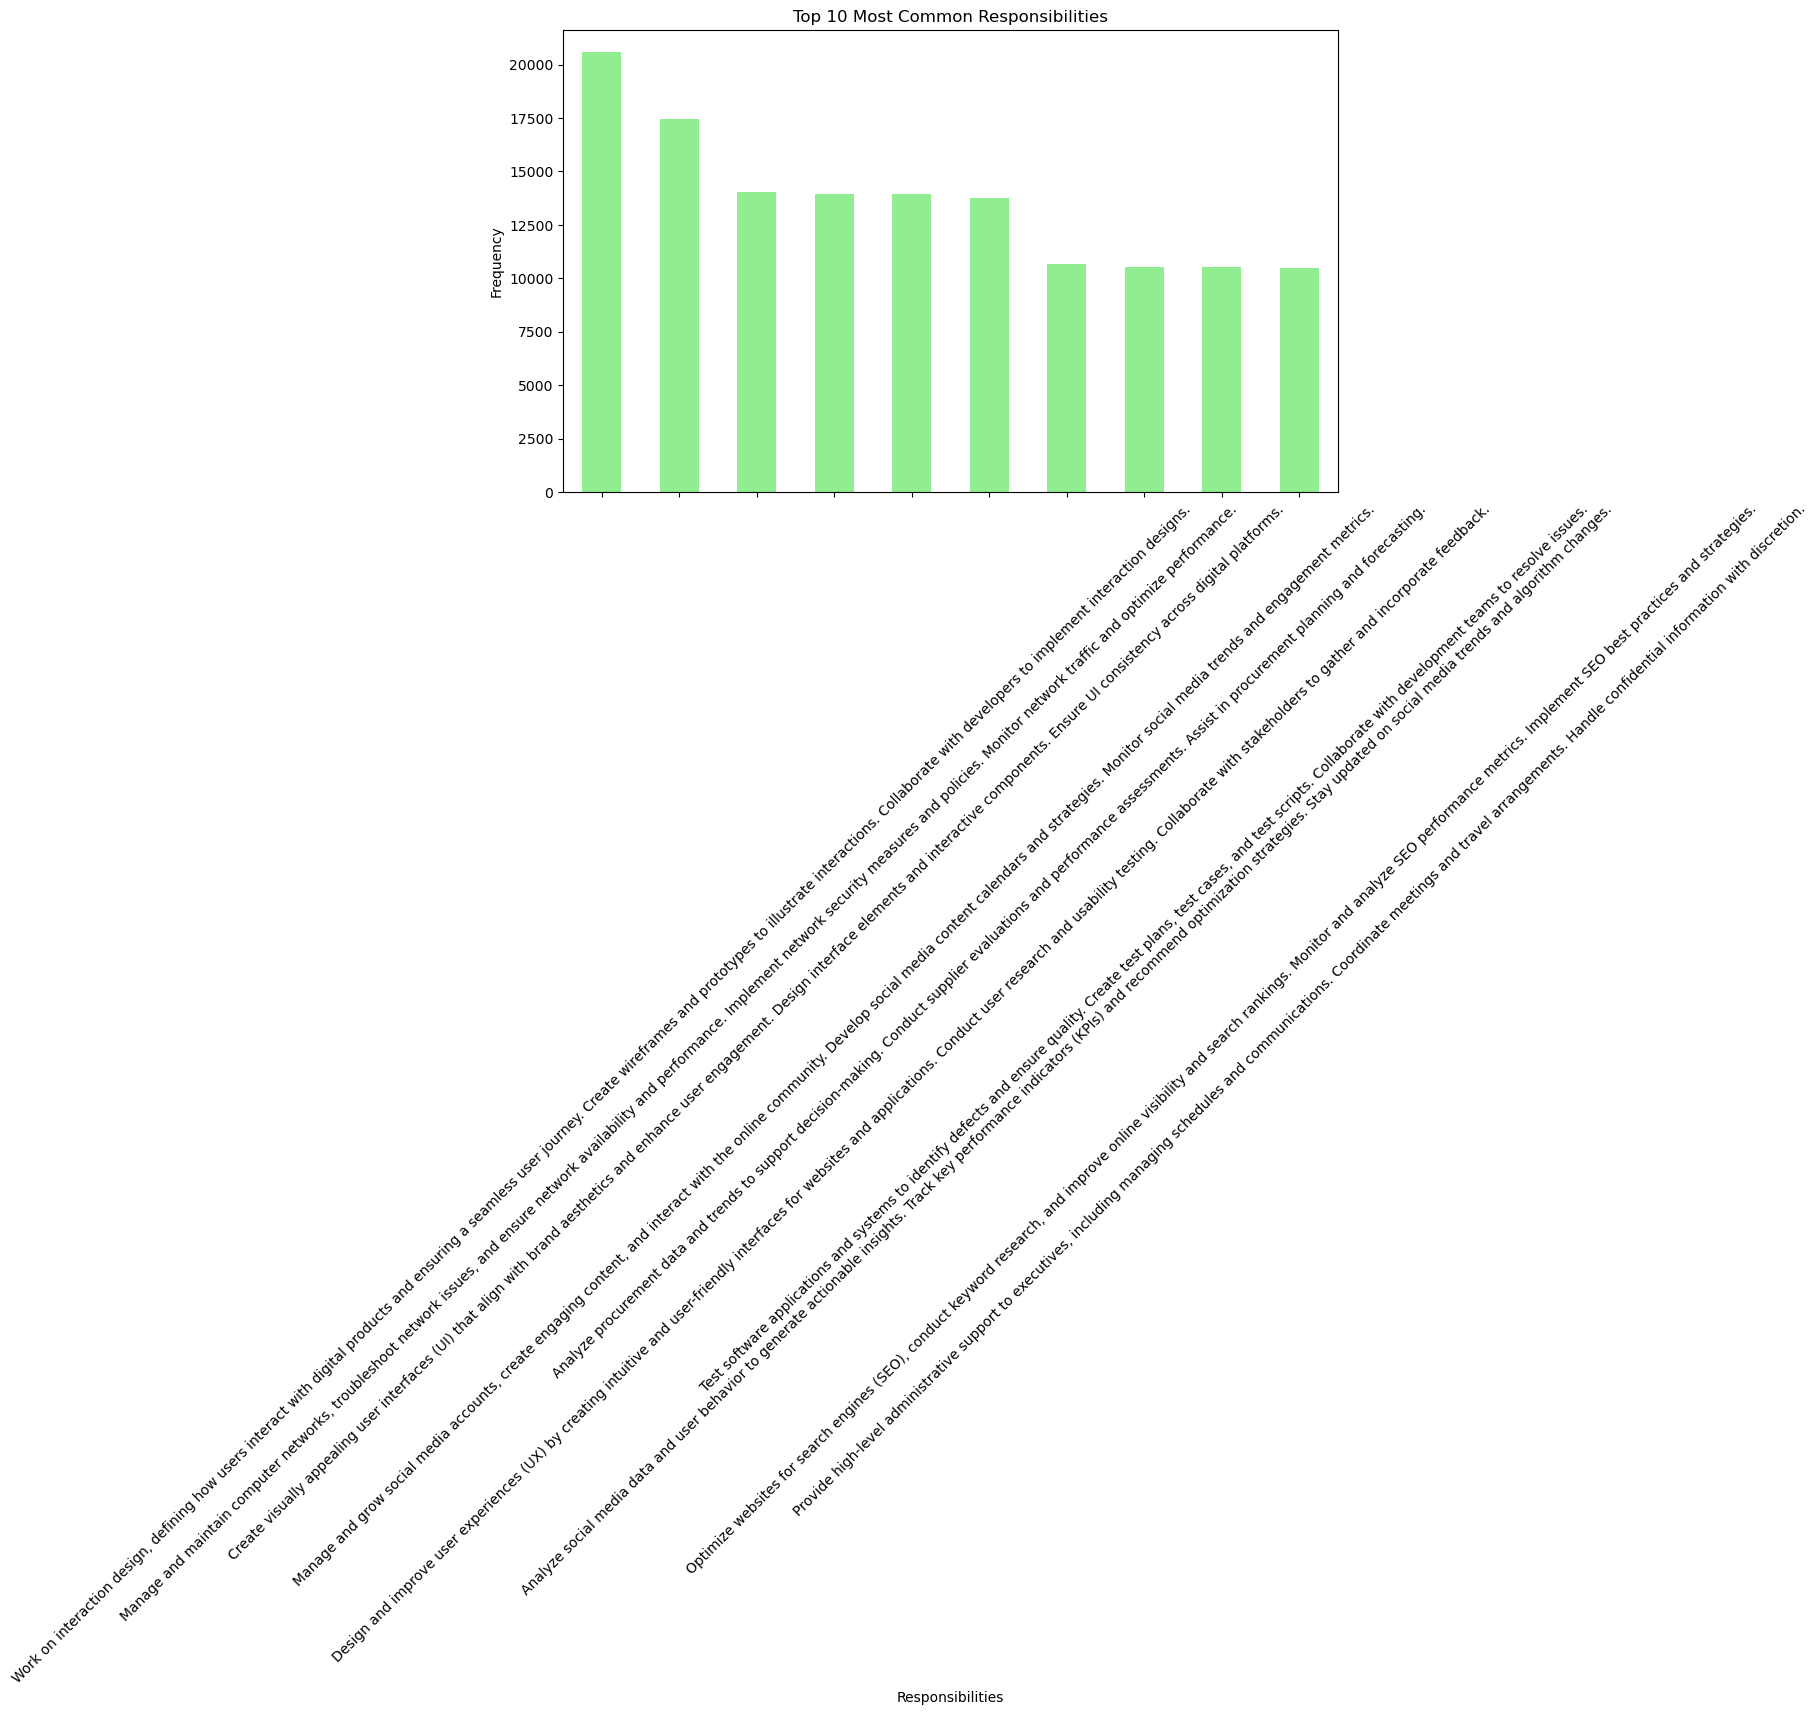

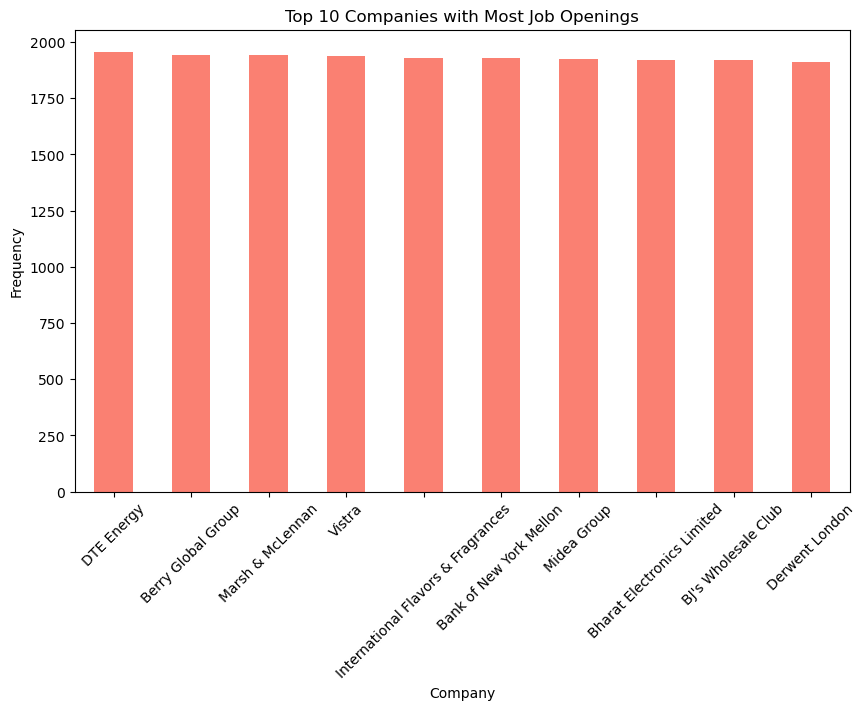

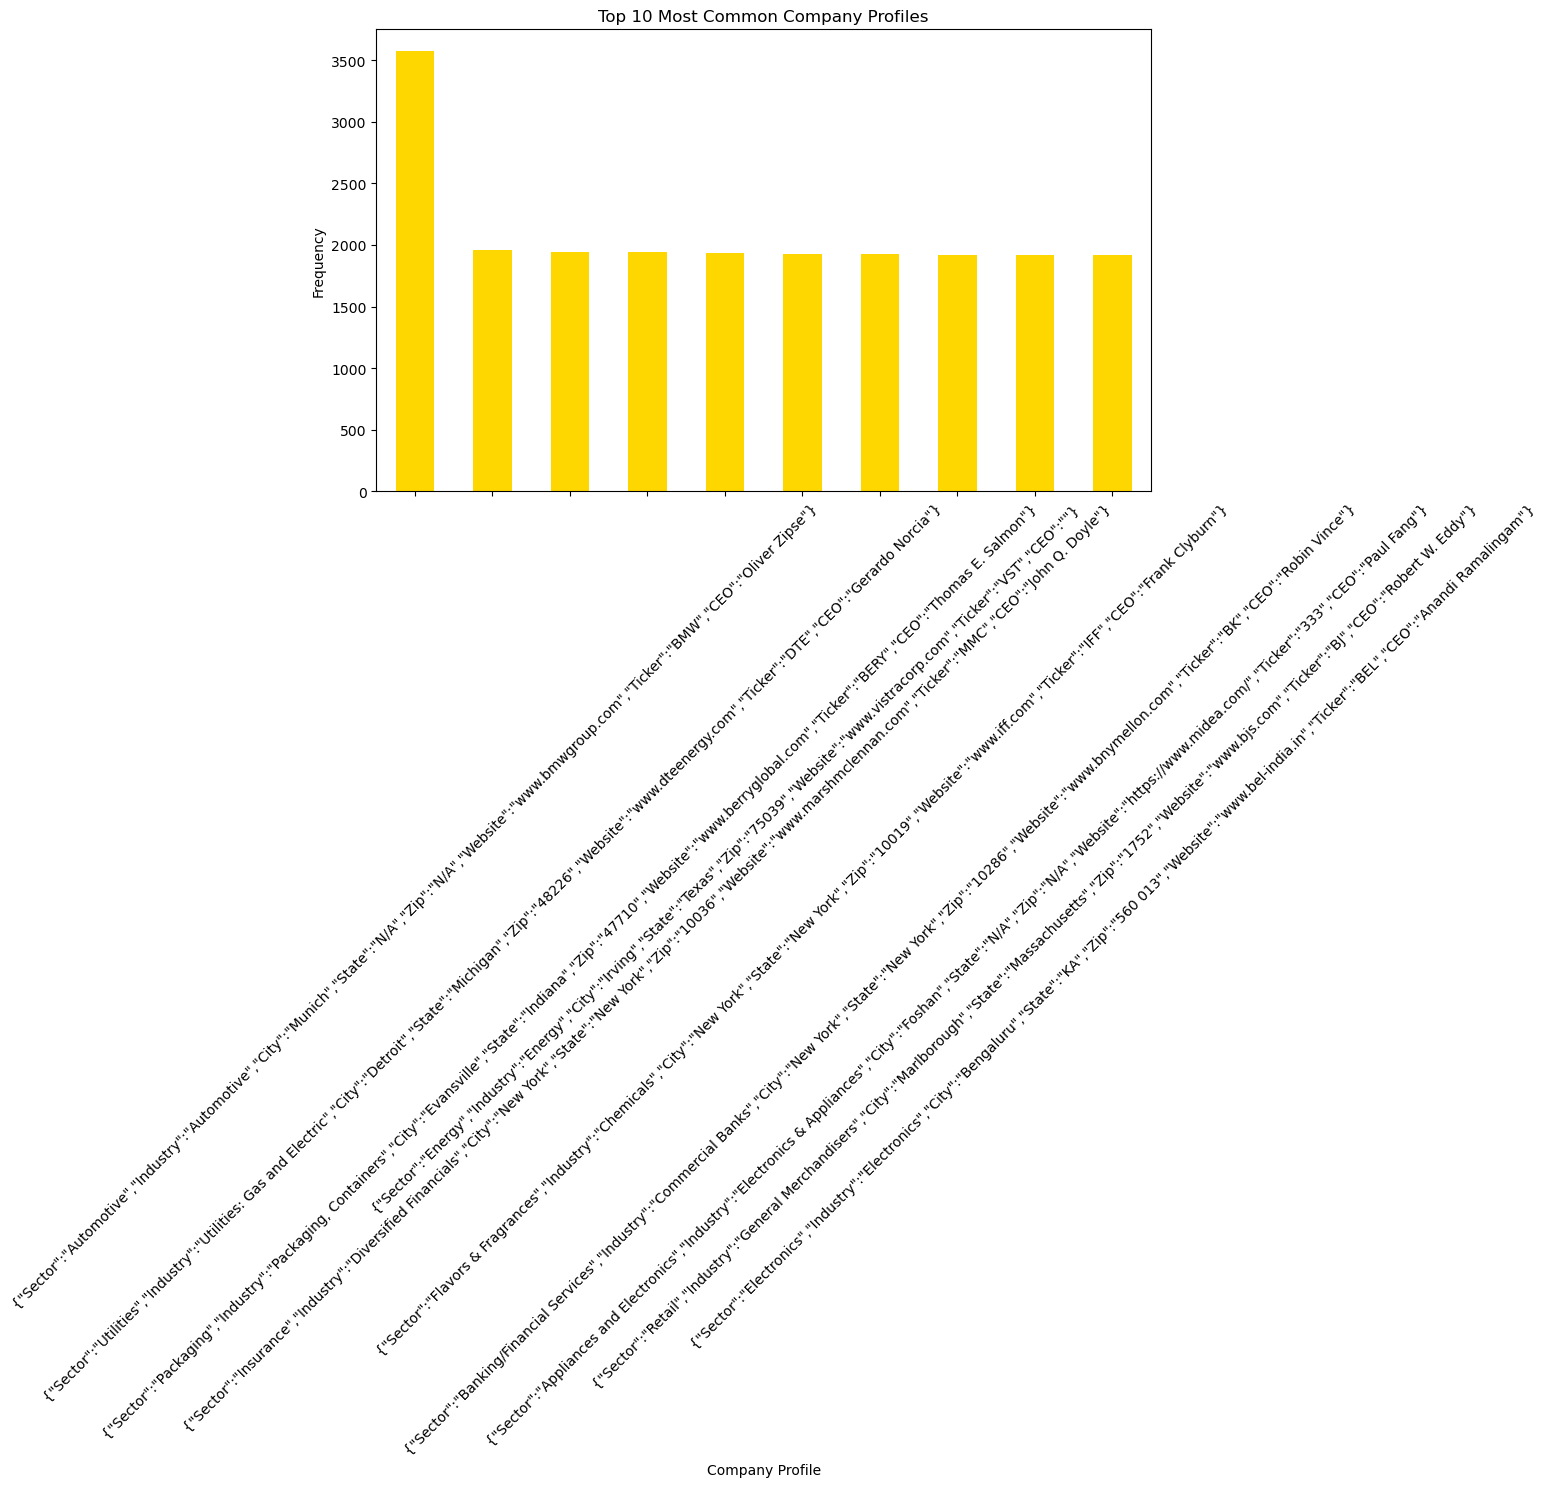

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('job_descriptions.csv')

# Plotting skills
skills_counts = data['skills'].value_counts().head(10)
plt.figure(figsize=(10,6))
skills_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Required Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting responsibilities
responsibilities_counts = data['Responsibilities'].value_counts().head(10)
plt.figure(figsize=(10,6))
responsibilities_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Common Responsibilities')
plt.xlabel('Responsibilities')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting companies
company_counts = data['Company'].value_counts().head(10)
plt.figure(figsize=(10,6))
company_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Companies with Most Job Openings')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting company profiles
company_profile_counts = data['Company Profile'].value_counts().head(10)
plt.figure(figsize=(10,6))
company_profile_counts.plot(kind='bar', color='gold')
plt.title('Top 10 Most Common Company Profiles')
plt.xlabel('Company Profile')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


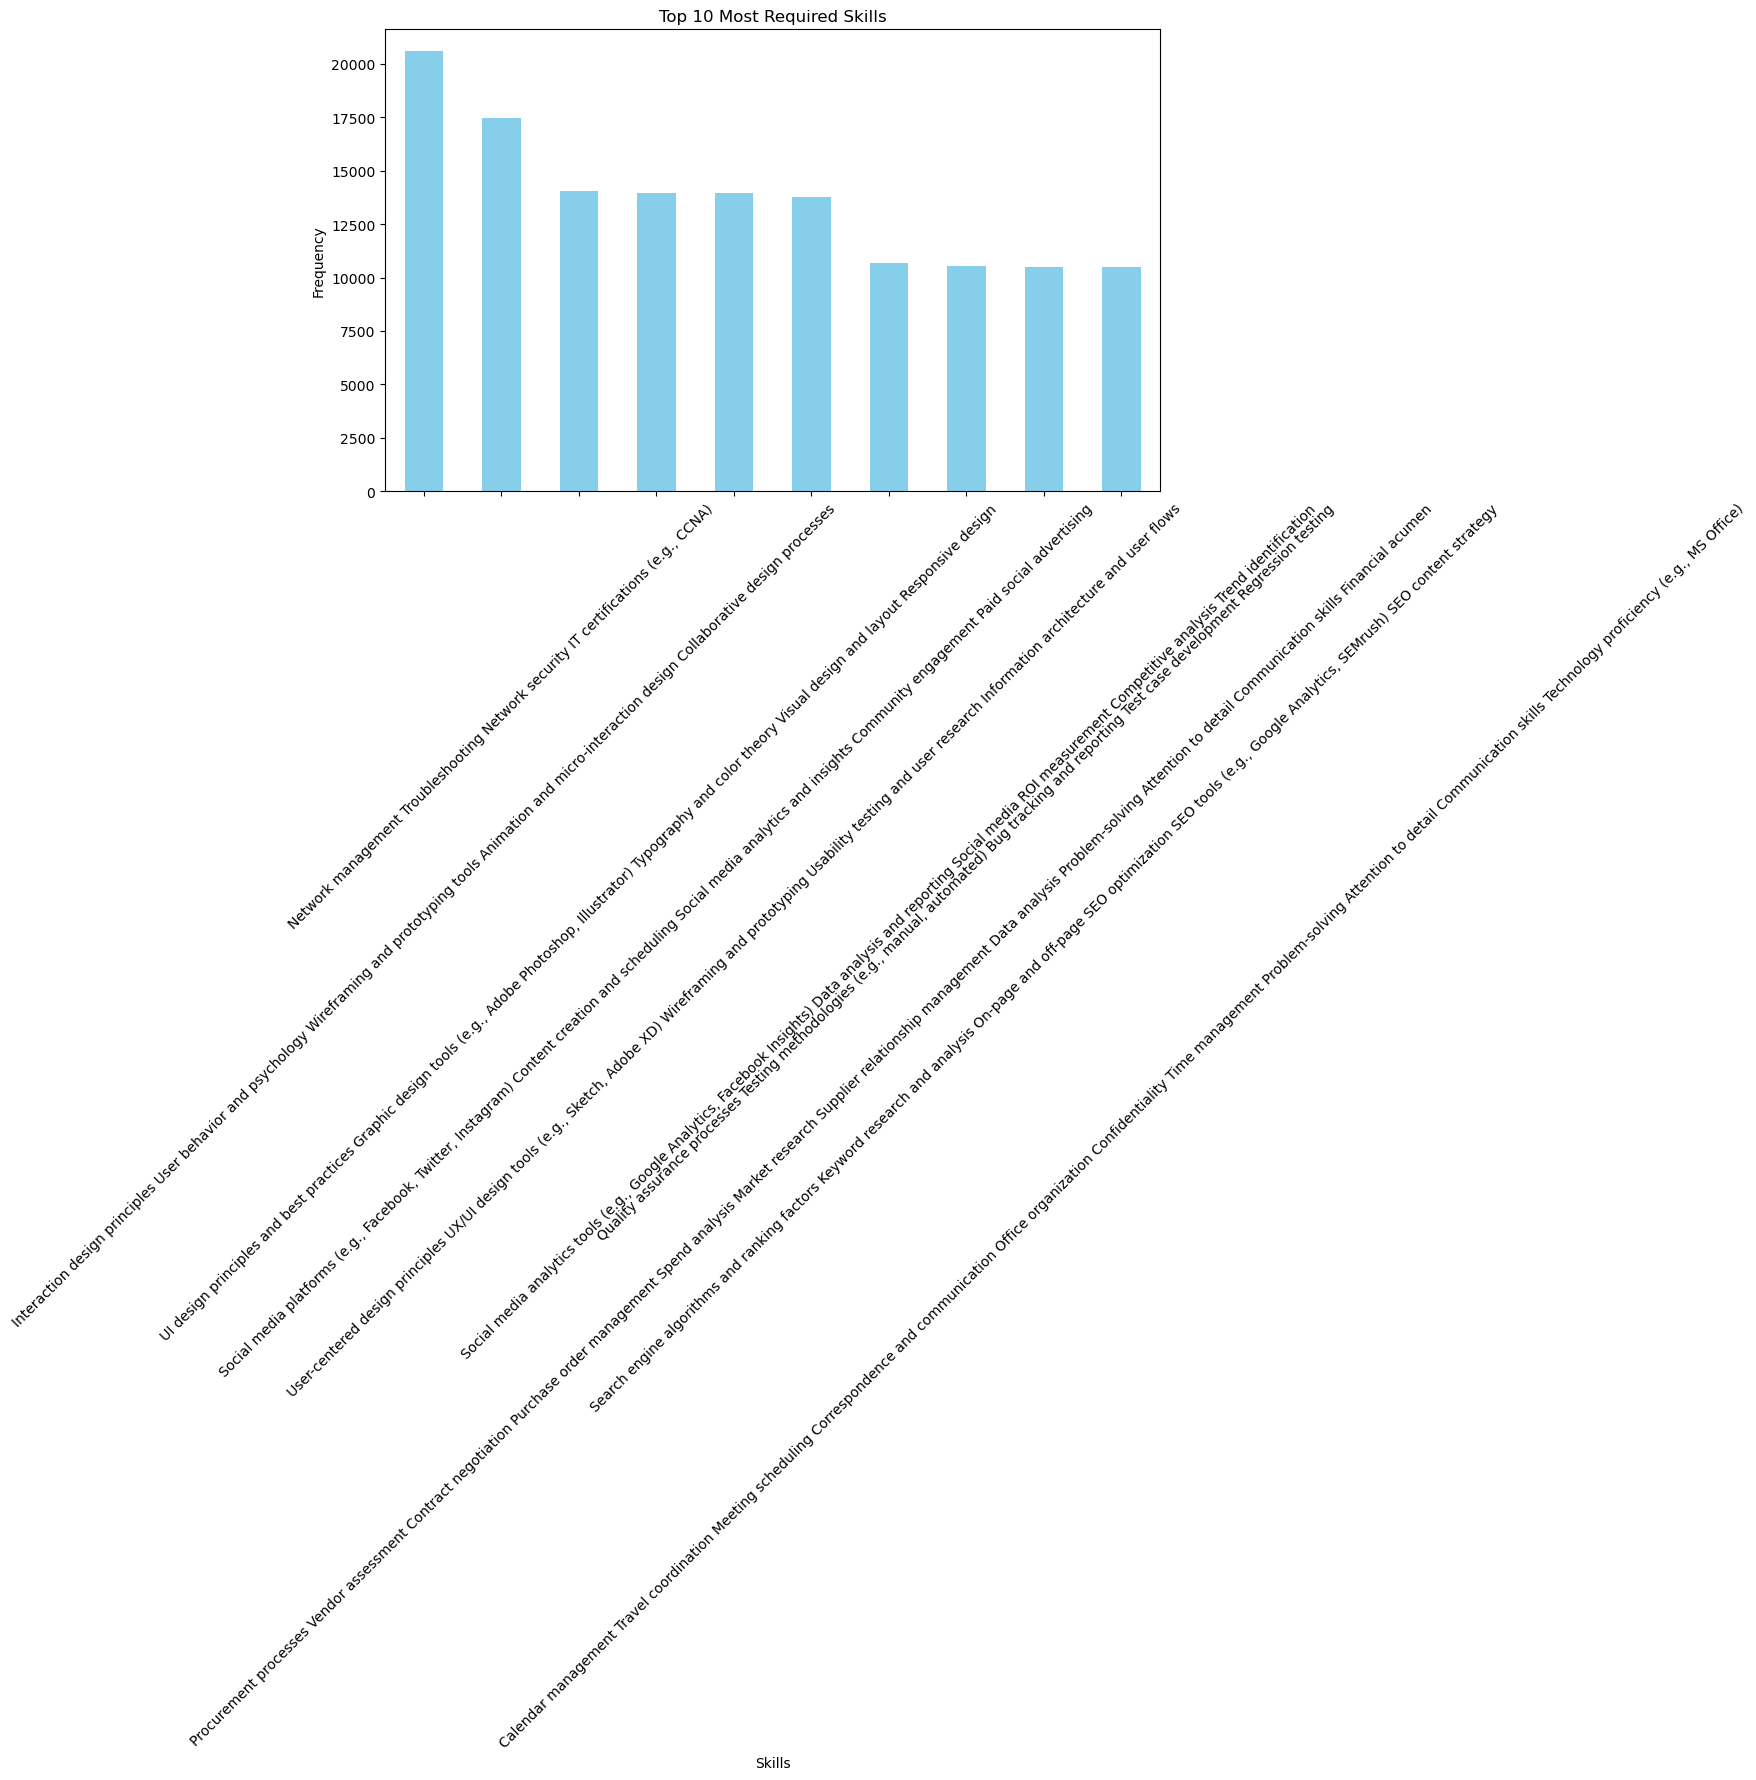

In [2]:
# Plotting skills
skills_counts = data['skills'].value_counts().head(10)
plt.figure(figsize=(10,6))
skills_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Required Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


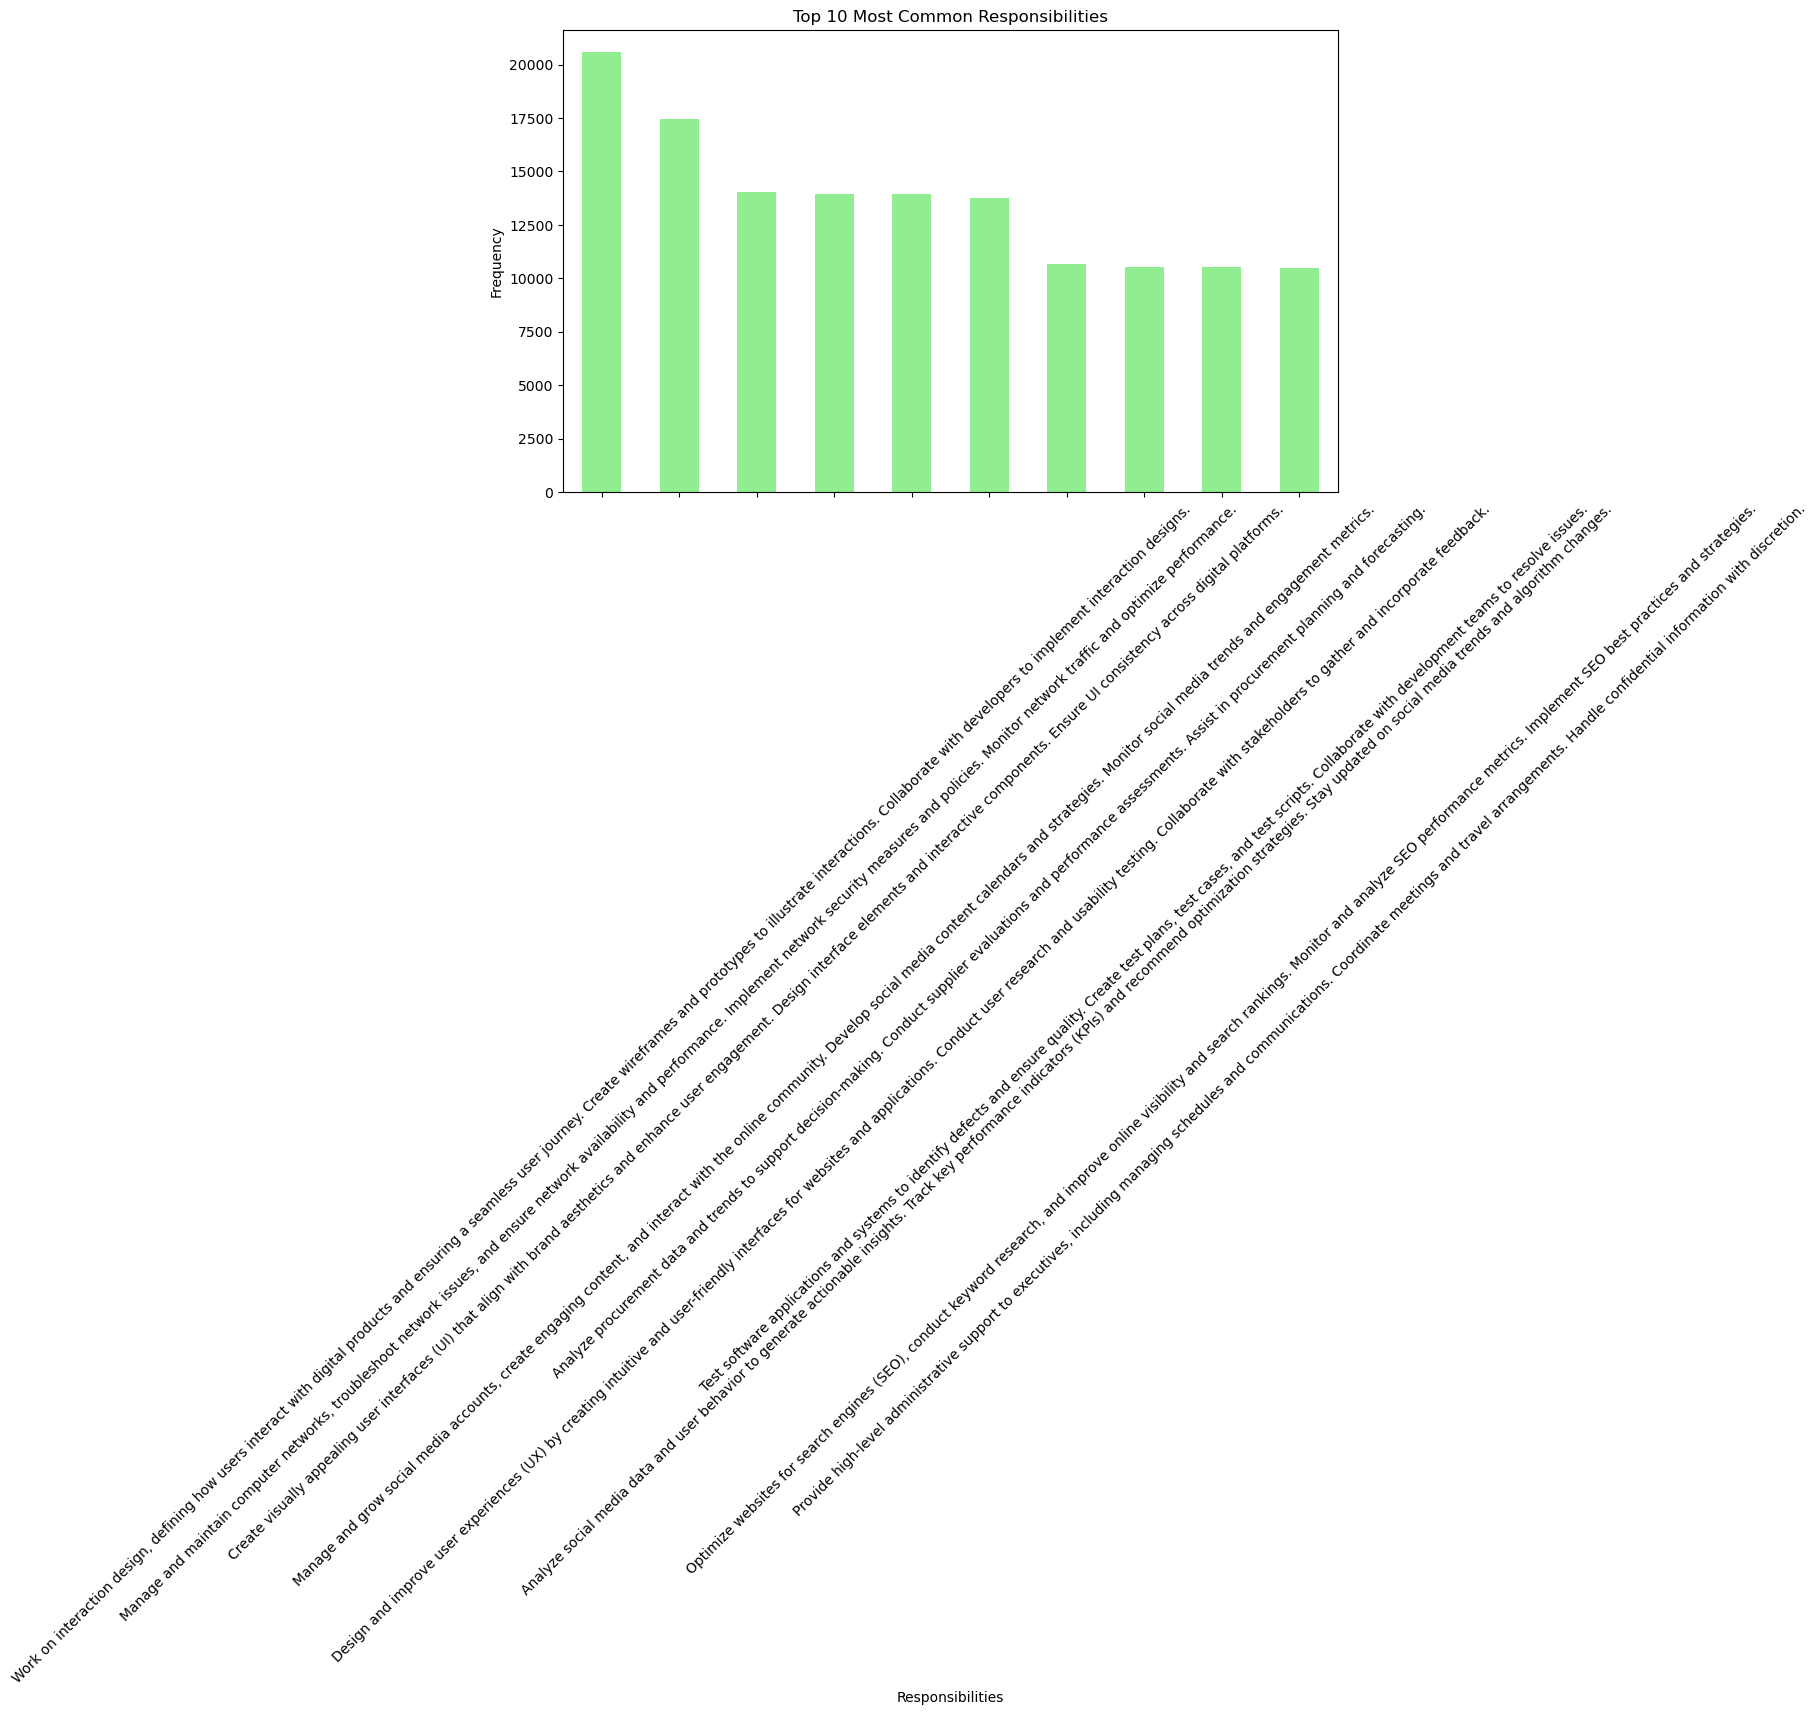

In [3]:
# Plotting responsibilities
responsibilities_counts = data['Responsibilities'].value_counts().head(10)
plt.figure(figsize=(10,6))
responsibilities_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Common Responsibilities')
plt.xlabel('Responsibilities')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

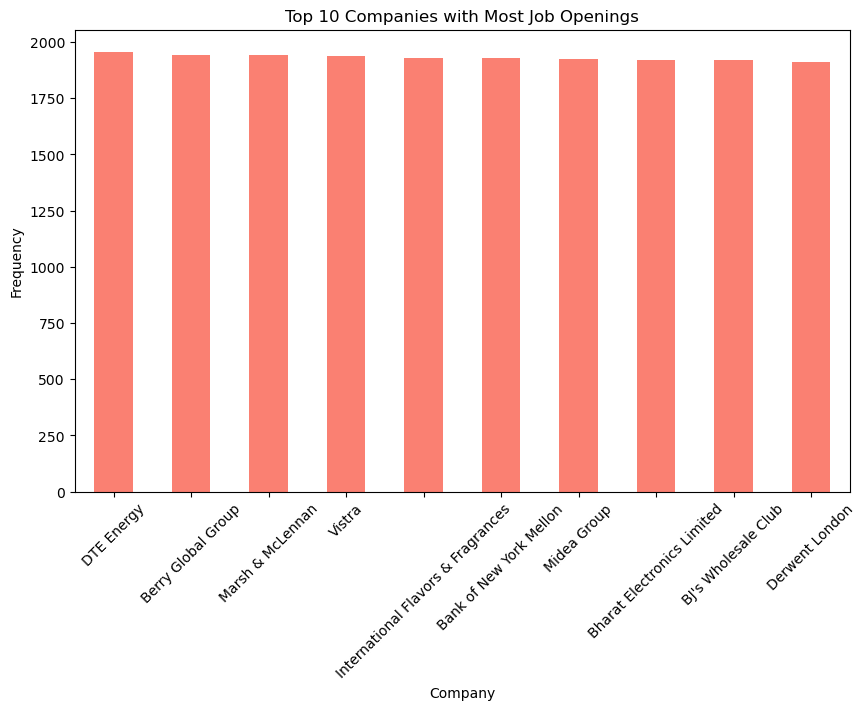

In [4]:
# Plotting companies
company_counts = data['Company'].value_counts().head(10)
plt.figure(figsize=(10,6))
company_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Companies with Most Job Openings')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


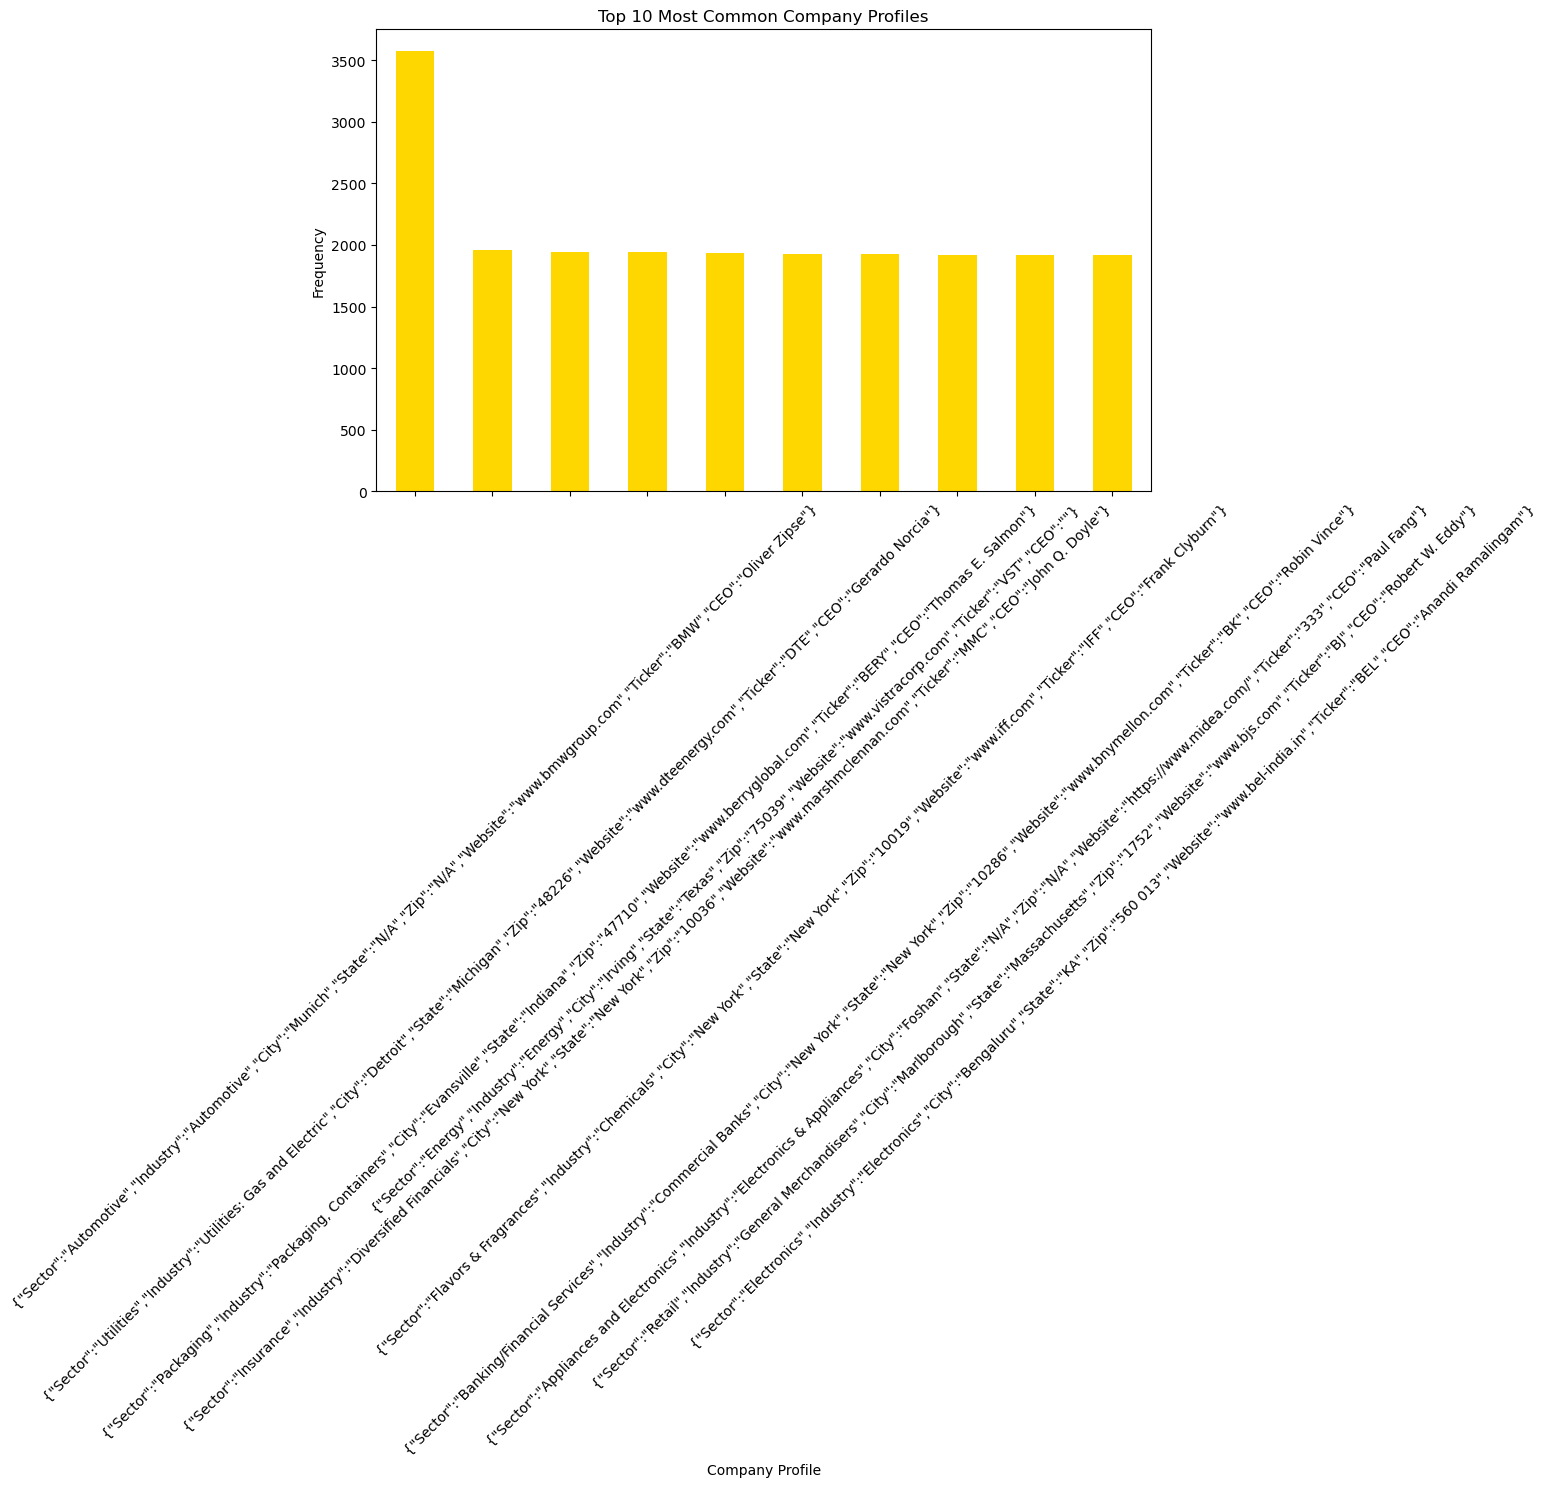

In [5]:
# Plotting company profiles
company_profile_counts = data['Company Profile'].value_counts().head(10)
plt.figure(figsize=(10,6))
company_profile_counts.plot(kind='bar', color='gold')
plt.title('Top 10 Most Common Company Profiles')
plt.xlabel('Company Profile')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Example of keyword extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(x['skills'].dropna())
tfidf_features = tfidf_vectorizer.get_feature_names_out()
print("Top 10 keywords for skills:")
print(tfidf_features[:10])

# Example of sentiment analysis using TextBlob
x['Job_Description_Sentiment'] = x['Job Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print("Average sentiment of job descriptions:", x['Job_Description_Sentiment'].mean())



NameError: name 'x' is not defined

In [2]:
#Analyze skill gaps and match candidate profiles to job requirements.
Identify emerging skills and responsibilities in specific industries.
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load the dataset
data = pd.read_csv('job_descriptions.csv')

# Tokenize and extract skills from job descriptions
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000)
X = vectorizer.fit_transform(data['Job Description'].dropna())
skills = vectorizer.get_feature_names_out()

# Categorize skills into relevant categories
technical_skills = []
soft_skills = []

for skill in skills:
    if 'technical' in skill.lower() or 'programming' in skill.lower():
        technical_skills.append(skill)
    else:
        soft_skills.append(skill)

print("Technical Skills:", technical_skills)
print("Soft Skills:", soft_skills)


Technical Skills: ['provide technical', 'technical', 'technical support']
Soft Skills: ['account', 'accounting', 'accounts', 'accurate', 'achieve', 'acquisitions', 'across', 'activities', 'address', 'administrative', 'administrative support', 'administrative tasks', 'administrators', 'administrators manage', 'advertising', 'advice', 'advise', 'advisors', 'aesthetically', 'aesthetically pleasing', 'aesthetics', 'agile', 'align', 'align with', 'all', 'also', 'an', 'an organization', 'an organizations', 'analysis', 'analysis and', 'analyst', 'analysts', 'analysts analyze', 'analyze', 'analyze data', 'analyze financial', 'analyze social', 'analyzes', 'and', 'and analysis', 'and analyze', 'and analyzes', 'and applications', 'and assisting', 'and collaborate', 'and customer', 'and data', 'and design', 'and develop', 'and develops', 'and educate', 'and efficiency', 'and efficient', 'and engagement', 'and engaging', 'and enhance', 'and ensure', 'and ensures', 'and ensuring', 'and execute', 'an

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob

# Load the datasets
job_data = pd.read_csv('job_descriptions.csv')
candidate_data = pd.read_csv('candidate_profiles.csv')
company_data = pd.read_csv('company_profiles.csv')

# Analyze skill gaps and match candidate profiles to job requirements
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000)
X_job = vectorizer.fit_transform(job_data['Job Description'].dropna())
job_skills = vectorizer.get_feature_names_out()

X_candidate = vectorizer.transform(candidate_data['Skills'].dropna())
candidate_skills = vectorizer.get_feature_names_out()

# Calculate cosine similarity between job requirements and candidate skills
similarity_matrix = cosine_similarity(X_job, X_candidate)

# Identify matching candidates for each job
for i, job_row in job_data.iterrows():
    job_title = job_row['Job Title']
    job_skills = vectorizer.transform([job_row['Job Description']])
    job_candidates = candidate_data.loc[similarity_matrix[i] > 0.7]  # Adjust similarity threshold as needed
    print(f"Matching candidates for {job_title}: {', '.join(job_candidates['Name'])}")

# Identify emerging skills and responsibilities
# Your code for analyzing job descriptions and identifying emerging skills and responsibilities goes here

# Analyze company profiles
# Your code for analyzing company profiles and understanding company reputation, values, and culture goes here

# Assessing company branding impact
# Your code for analyzing the impact of company branding on candidate attraction and retention goes here

# Identifying alignment between company values and candidate preferences
# Your code for comparing company values with candidate preferences and identifying alignment goes here


FileNotFoundError: [Errno 2] No such file or directory: 'candidate_profiles.csv'

In [5]:
import pandas as pd

import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('job_descriptions.csv')

# Concatenate all job descriptions into a single string
all_descriptions = ' '.join(data['Job Description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Descriptions')
plt.axis('off')
plt.show()

# Analyze sentiment of job descriptions
sentiments = data['Job Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores in Job Descriptions')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


NameError: name 'WordCloud' is not defined

In [6]:
import pandas as pd

import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('job_descriptions.csv')

# Concatenate all job descriptions into a single string
all_descriptions = ' '.join(data['Job Description'].dropna())



# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Descriptions')
plt.axis('off')
plt.show()

# Analyze sentiment of job descriptions
sentiments = data['Job Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores in Job Descriptions')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [7]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 495.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 981.9 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 976.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


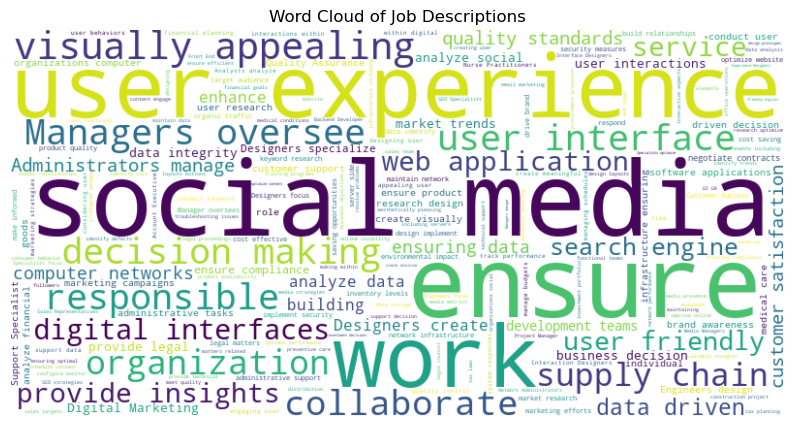

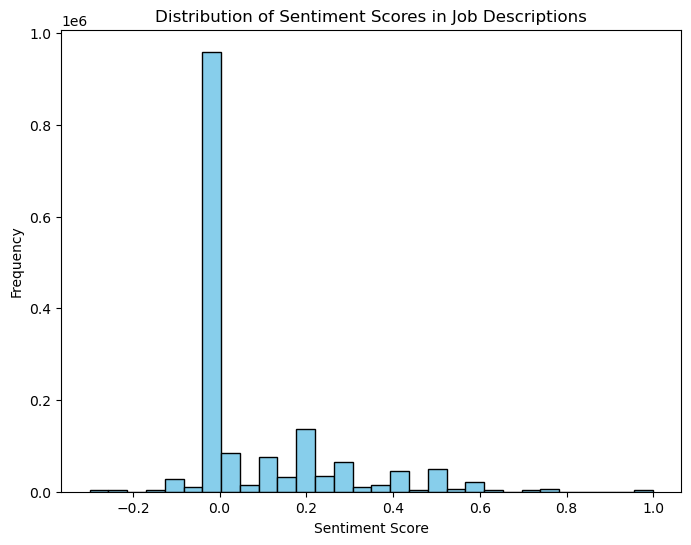

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset
data = pd.read_csv('job_descriptions.csv')

# Concatenate all job descriptions into a single string
all_descriptions = ' '.join(data['Job Description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Descriptions')
plt.axis('off')
plt.show()

# Analyze sentiment of job descriptions
sentiments = data['Job Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(sentiments, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores in Job Descriptions')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()



In [13]:
data.describe()

Job Id      latitude     longitude  Company Size
count  1.615940e+06  1.615940e+06  1.615940e+06  1.615940e+06
mean   1.548935e+15  1.937743e+01  1.639926e+01  7.370467e+04
std    8.946722e+14  2.355690e+01  7.066762e+01  3.529886e+04
min    1.817948e+11 -4.090060e+01 -1.751982e+02  1.264600e+04
25%    7.740508e+14  5.152100e+00 -1.531010e+01  4.311400e+04
50%    1.547858e+15  1.807080e+01  1.914510e+01  7.363300e+04
75%    2.323729e+15  3.907420e+01  4.757690e+01  1.043000e+05
max    3.099618e+15  7.170690e+01  1.780650e+02  1.348340e+05

In [ ]:
data.columns;

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


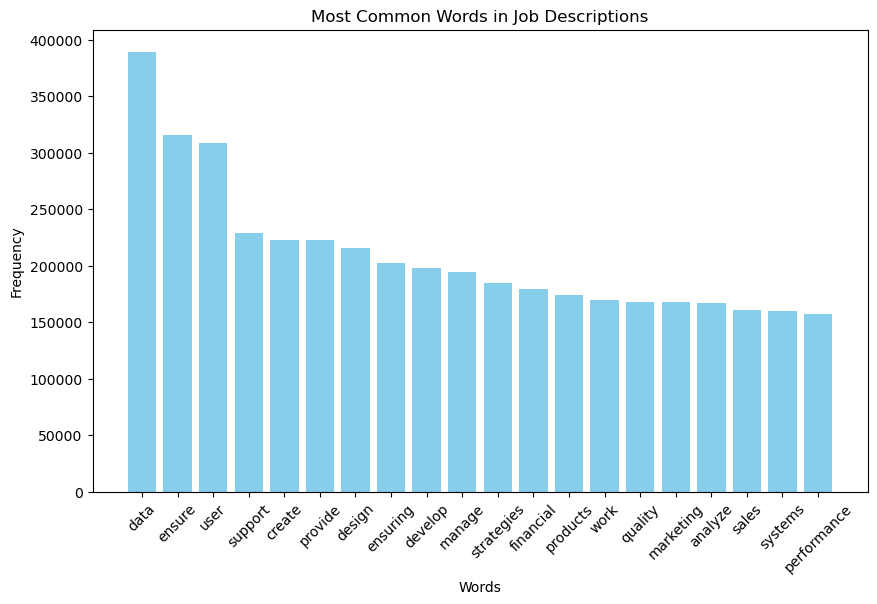

In [23]:
from collections import Counter
import re
from nltk.corpus import stopwords

# Download stopwords 
import nltk
nltk.download('stopwords')

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
words = re.findall(r'\w+', all_descriptions.lower())
filtered_words = [word for word in words if word not in stop_words]

# Get the most common words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plot the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Most Common Words in Job Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


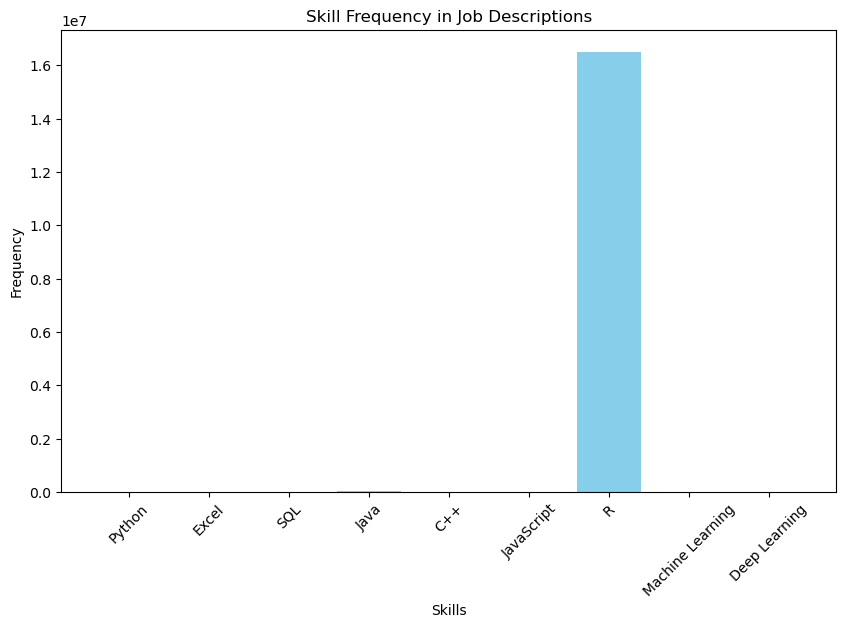

In [24]:
skills = ['Python', 'Excel', 'SQL', 'Java', 'C++', 'JavaScript', 'R', 'Machine Learning', 'Deep Learning']
skill_counts = {skill: all_descriptions.lower().count(skill.lower()) for skill in skills}

# Plot skill frequencies
plt.figure(figsize=(10, 6))
plt.bar(skill_counts.keys(), skill_counts.values(), color='skyblue')
plt.title('Skill Frequency in Job Descriptions')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


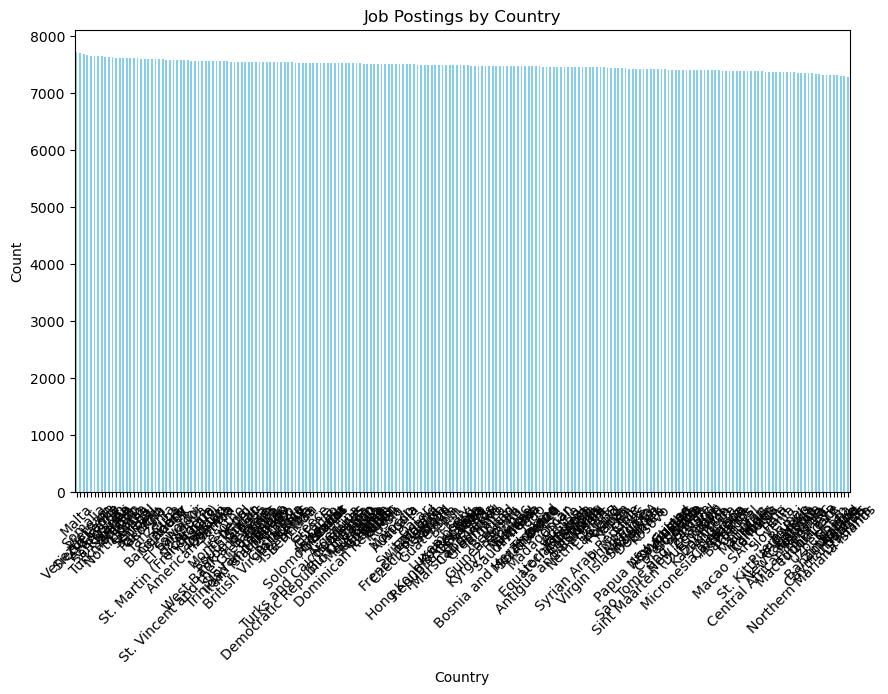

In [26]:
# Plot the number of job postings per country
country_counts = data['Country'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Job Postings by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



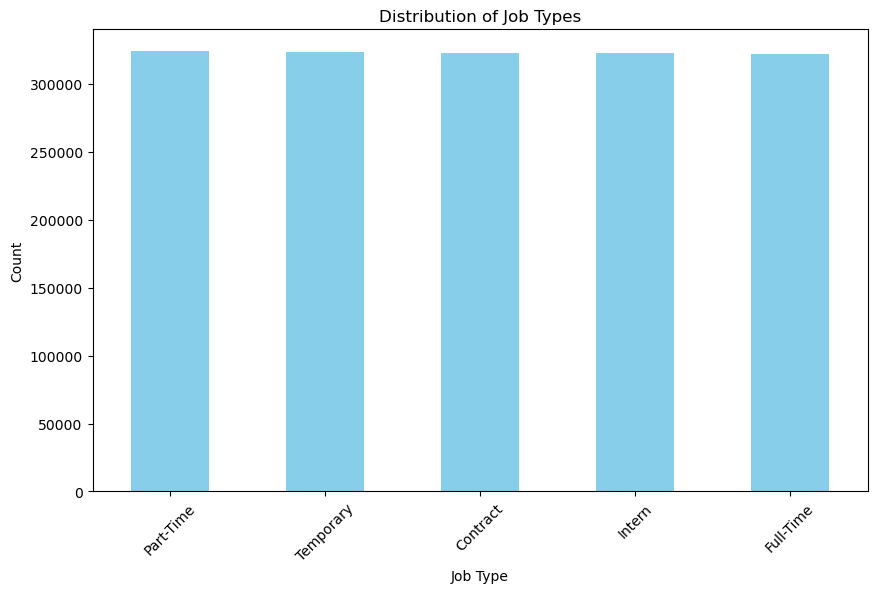

In [27]:
# Plot the distribution of job types
job_type_counts = data['Work Type'].value_counts()

plt.figure(figsize=(10, 6))
job_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


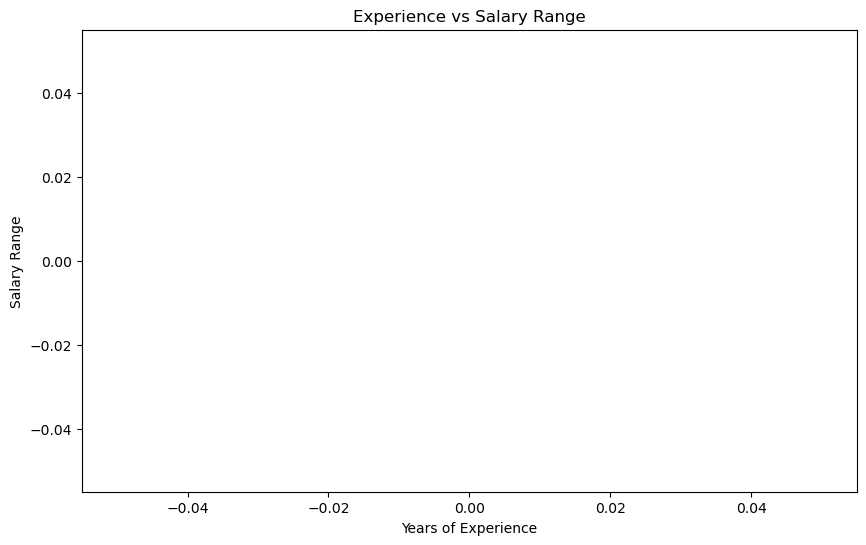

In [29]:

import seaborn as sns

# Remove NaN values for plotting
experience_salary_data = data[['Experience', 'Salary Range']].dropna()

plt.figure(figsize=(10, 6))
sns.regplot(x='Experience', y='Salary Range', data=experience_salary_data, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
plt.title('Experience vs Salary Range')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Range')
plt.show()


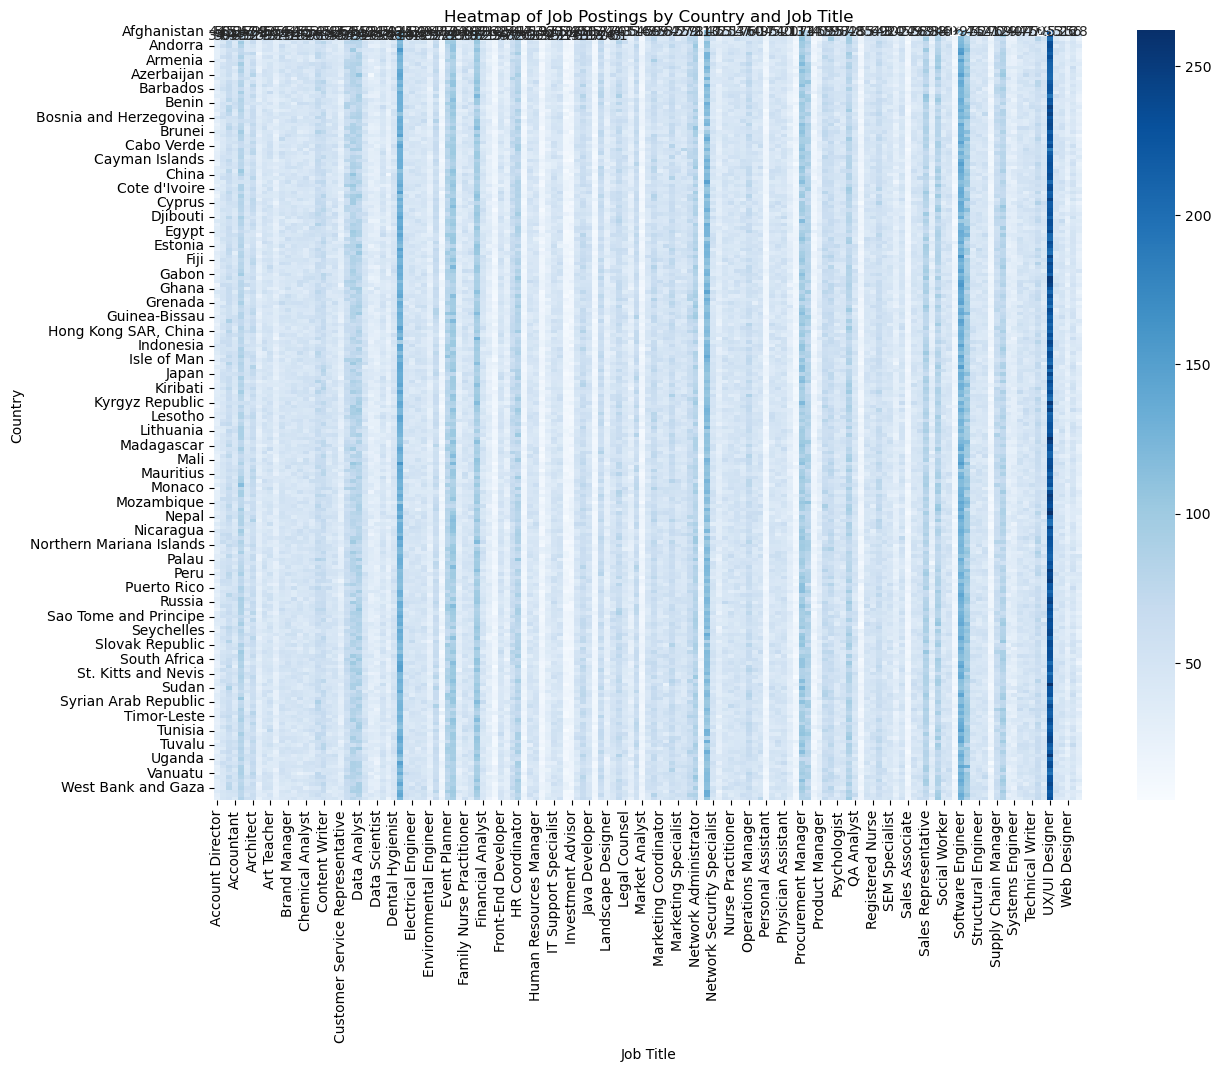

In [30]:
# For the heatmap, we'll need a pivot table
country_job_counts = data.pivot_table(index='Country', columns='Job Title', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(country_job_counts, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Job Postings by Country and Job Title')
plt.xlabel('Job Title')
plt.ylabel('Country')
plt.show()


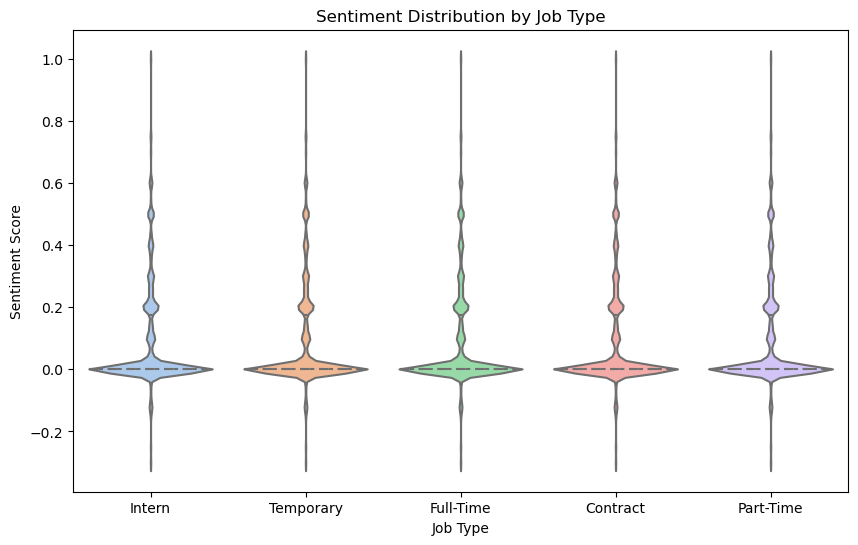

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Work Type', y=sentiments, data=data, inner='quartile', palette='pastel')
plt.title('Sentiment Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Sentiment Score')
plt.show()


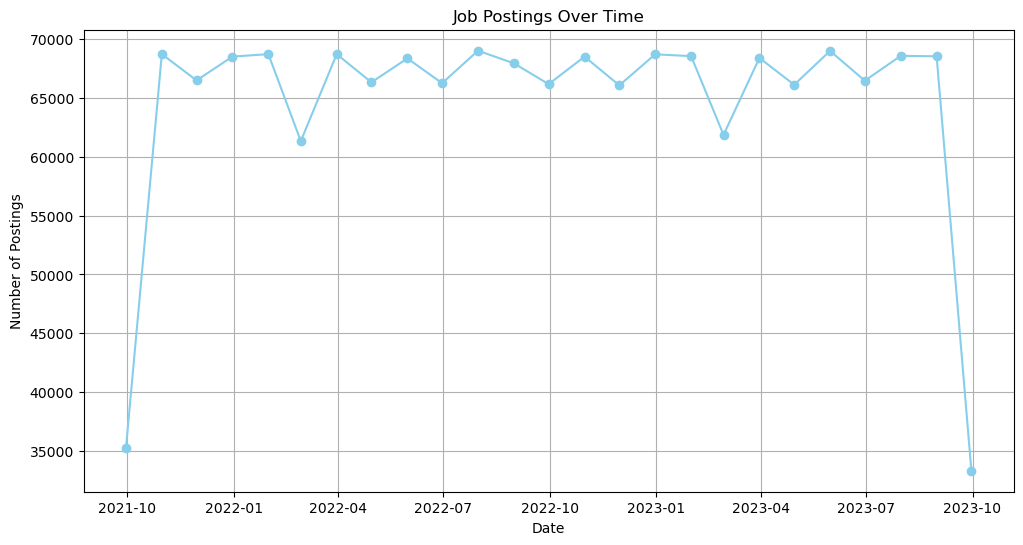

In [32]:
data['Job Posting Date'] = pd.to_datetime(data['Job Posting Date'])
data.set_index('Job Posting Date', inplace=True)

# Resample to get job postings per month
monthly_postings = data.resample('M').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_postings.index, monthly_postings, marker='o', color='skyblue')
plt.title('Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.grid(True)
plt.show()
